# Predict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import re
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_train = pd.read_csv(r'C:\Users\court\Desktop\AdvRegPre\regression_JM3_DSFT\regression_JM3_DSFT\data\df-train_set.csv')
df_test = pd.read_csv(r'C:\Users\court\Desktop\AdvRegPre\regression_JM3_DSFT\regression_JM3_DSFT\data\df-test_set.csv')
test_ID = df_test['Index']
df_test = df_test.drop('Index', axis=1)

In [3]:
#Getting the months and quarters for the dates for train data by converting the data to datetime format
df_gda = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS']
df_gda.date = pd.to_datetime(df_gda.Date) 
df_gda["Quarter"] = df_gda.date.dt.quarter 
df_gda["Month"] = df_gda.date.dt.month
df_gda["Year"] = df_gda.date.dt.year

df_gda.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


In [4]:
#Getting the months and quarters for the dates for test data
df_test.date = pd.to_datetime(df_test.Date)
df_test["Quarter"] = df_test.date.dt.quarter
df_test["Month"] = df_test.date.dt.month
df_test["Year_Month"] = df_test.date.dt.year

df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0,3,7,2020
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2,1,1,2020
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45,3,8,2020
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8,2,5,2020
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19,2,5,2020


In [5]:
df_gda = df_gda.drop('Date', axis=1)
df_gda.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,Year
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,2020
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,2020
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,2020
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,2020


In [6]:
dummy_df = pd.get_dummies(df_gda, drop_first=True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Quarter,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,3,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,3,9,...,0,0,1,0,0,0,0,0,0,0


In [7]:
df_test = df_test.drop('Date', axis=1)
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,128.0,136.0,5008.0,38,456.0,0,3,7,2020
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,220.0,220.0,1760.0,8,146.4,2,1,1,2020
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,120.0,120.0,720.0,6,72.0,45,3,8,2020
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,160.0,160.0,160.0,1,18.3,8,2,5,2020
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,140.0,160.0,14140.0,100,1830.0,19,2,5,2020


In [8]:
X = dummy_df.drop('avg_price_per_kg', axis=1)
y = dummy_df['avg_price_per_kg']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Start EDA

# End EDA

# Basic Linear Regression Model

In [10]:
lm = LinearRegression()

In [11]:
# Fitting the model to the training data 
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm,file)

In [13]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Generate the values that fall along our regression line
prediction = lm.predict(X_real)

In [15]:
# create submission dataframe for price of apples
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [16]:
submission.head()

,Index,avg_price_per_kg
0,1,8.702426
1,2,8.828859
2,3,8.361219
3,4,7.932765
4,5,8.521547


In [17]:
submission.describe()

,Index,avg_price_per_kg
count,685.000000,685.000000
mean,343.000000,6.908850
std,197.886752,1.624798
min,1.000000,-1.620930
25%,172.000000,5.877891
50%,343.000000,6.955832
75%,514.000000,8.186352
max,685.000000,10.904506


In [18]:
submission.to_csv("lm.csv", index=False)

# Ridge Regression

In [19]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [20]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [21]:
# Create ridge model
ridge = Ridge()

In [22]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [23]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [24]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [25]:
print("Intercept:", float(b0))

Intercept: 2790.1964785262453


In [26]:
# Check out the coefficients
coeff

,Coefficient
Weight_Kg,-0.011814
Low_Price,0.000278
High_Price,0.001740
Sales_Total,0.000071
Total_Qty_Sold,-0.002282
Total_Kg_Sold,-0.000362
Stock_On_Hand,-0.000140
Quarter,-0.315406
Month,0.114916
Year,-1.377767


In [27]:
# Check training accuracy

train_ridge = ridge.predict(X_train)

print('Training MSE')

print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Ridge : 1.8774424733674402


In [28]:
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge,file)

In [29]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [30]:
prediction = ridge.predict(X_real)

In [31]:
# create submission dataframe for price of apples
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [32]:
submission.head()

,Index,avg_price_per_kg
0,1,8.703995
1,2,8.823244
2,3,8.361802
3,4,7.976387
4,5,8.474749


In [33]:
submission.describe()

,Index,avg_price_per_kg
count,685.000000,685.000000
mean,343.000000,6.910237
std,197.886752,1.608847
min,1.000000,-1.547760
25%,172.000000,5.870290
50%,343.000000,6.978449
75%,514.000000,8.179626
max,685.000000,10.869032


In [34]:
submission.to_csv("ridge.csv", index=False)

In [35]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

# Create ridge model
ridge = Ridge()

# Train the model
ridge.fit(X_train, y_train)

# Extract the model intercept value
b0 = float(ridge.intercept_)

# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", float(b0))

# Check out the coefficients
coeff

# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

# Check training accuracy

train_ridge = ridge.predict(X_train)

print('Training MSE')

print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(ridge,file)

X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

prediction = ridge.predict(X_real)

# create submission dataframe for price of apples
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

submission.head()

submission.describe()

submission.to_csv("ridge.csv", index=False)

Intercept: 2790.1964785262453
Training MSE
Ridge : 1.8774424733674402


# Lasso Regression

In [36]:
# Import LASSO module
from sklearn.linear_model import Lasso

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# Train the LASSO model
lasso.fit(X_train, y_train)

# Extract intercept from model
intercept = float(lasso.intercept_)

# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

# Extract intercept
print("Intercept:", float(intercept))

coeff

train_lasso = lasso.predict(X_train)

test_lasso = lasso.predict(X_test)

# Dictionary of results
results_dict = {'Training MSE':
                    {
                        
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                       
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

results_df = pd.DataFrame(data=results_dict)

results_df

import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lasso,file)


X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

prediction = lasso.predict(X_real)

# create submission dataframe for price of apples
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

submission.head()

submission.describe()

submission.to_csv("lasso.csv", index=False)

Intercept: 2154.804976918067


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor()
dectree.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
y_pred = dectree.predict(X_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3324296675191818
Mean Squared Error: 0.5252163682864449
Root Mean Squared Error: 0.7247181302316404


In [40]:
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dectree,file)

In [41]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [42]:
prediction = dectree.predict(X_real)

In [43]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [44]:
submission.head()

,Index,avg_price_per_kg
0,1,10.67
1,2,11.12
2,3,10.00
3,4,8.74
4,5,8.19


In [45]:
submission.describe()

,Index,avg_price_per_kg
count,685.000000,685.000000
mean,343.000000,6.975796
std,197.886752,2.122250
min,1.000000,0.250000
25%,172.000000,5.560000
50%,343.000000,6.810000
75%,514.000000,8.310000
max,685.000000,14.210000


In [46]:
submission.to_csv("decision_tree.csv", index=False)

# Random Forest

In [47]:
rf = RandomForestRegressor(n_estimators=10)

In [48]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [49]:
train_rf = rf.predict(X_train)

In [50]:
test_rf = rf.predict(X_test)

In [51]:
train_rmse_rf = np.sqrt(mean_squared_error(y_train, train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_rf))

In [52]:
train_rmse_rf

0.2797856287913213

In [53]:
test_rmse_rf

0.6104390877027752

In [54]:
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf,file)

In [55]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [56]:
prediction = rf.predict(X_real)

In [57]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [58]:
submission.head()

,Index,avg_price_per_kg
0,1,10.696
1,2,11.617
2,3,10.000
3,4,8.740
4,5,8.168


In [59]:
submission.to_csv("randomforest.csv", index=False)

# eXtreme Gradient Boost

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)
Training score:  0.999560280587592
Mean cross-validation score: 0.93
K-fold CV average score: 0.93
MSE: 0.23
RMSE: 0.48


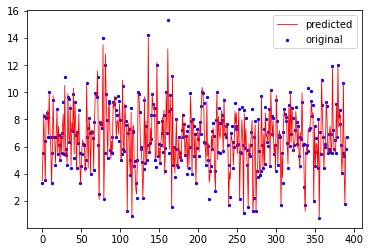

In [60]:
# SUPER MODEL TRAINING AND EXECUTION 

xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(X_train, y_train)
 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [67]:
train_xgb = xgbr.predict(X_train)

In [68]:
test_xgb = xgbr.predict(X_test)

In [69]:
from sklearn import metrics

In [70]:
# Dictionary of results
results_dict = {'Training MSE':
                    {
                        
                        "XGB": metrics.mean_squared_error(y_train, train_xgb)
                    },
                    'Test MSE':
                    {
                       
                        "XGB": metrics.mean_squared_error(y_test, test_xgb)
                    }
                }

In [71]:
results_df = pd.DataFrame(data=results_dict)

In [72]:
results_df

,Training MSE,Test MSE
XGB,0.002214,0.230375


In [73]:
#Saving the data
import pickle

model_save_path = "dct_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(xgbr,file)

In [74]:
X_real = pd.get_dummies(df_test, drop_first=True)
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Quarter,Month,Year_Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,12.0,128.0,136.0,5008.0,38,456.0,0,3,7,2020,...,0,1,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,1,1,2020,...,0,0,0,0,1,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,3,8,2020,...,0,0,1,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,2,5,2020,...,0,1,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2,5,2020,...,0,0,0,0,0,0,0,0,0,0


In [75]:
prediction = xgbr.predict(X_real)

In [76]:
# create submission dataframe
# Create Dataframe of Order_No and Time from Pickup to Arrival
submission = pd.DataFrame(
    {'Index': test_ID,
     'avg_price_per_kg': prediction
    })

In [77]:
submission.head()

,Index,avg_price_per_kg
0,1,11.017114
1,2,11.860633
2,3,9.963531
3,4,8.647823
4,5,8.136109


In [78]:
submission.to_csv("xgbDT.csv", index=False)